# Business Understanding

## Project Domain

In [228]:
# Bidang Kesehatan Masyarakat

In [229]:
# Masalah Utama: Tingginya prevalensi stunting pada balita di Jawa Barat 
# masih menjadi tantangan serius bagi kesehatan masyarakat. 
# Meskipun data indikator kesehatan tersedia, pem dimanfaatannya untuk prediksi dini masih belum optimal.

# Kompleksitas Faktor: Stunting disebabkan oleh faktor yang multifaktorial dan kompleks, 
# seperti kurangnya akses sanitasi layak, riwayat Bayi Berat Lahir Rendah (BBLR), dan 
# cakupan imunisasi yang tidak merata. Menganalisis hubungan variabel-variabel ini 
# secara manual sangat sulit dan rentan kesalahan.

# Kebutuhan Intervensi: Pemerintah daerah membutuhkan alat bantu yang mampu 
# memprediksi potensi lonjakan kasus stunting berdasarkan data historis agar 
# dapat merumuskan kebijakan intervensi (seperti Program Makan Bergizi Gratis) 
# yang tepat sasaran dan berbasis data (data-driven).

## Problem Statements

In [230]:
# Masalah Utama: Tingginya prevalensi stunting pada balita di Jawa Barat masih menjadi tantangan serius bagi kesehatan masyarakat. Meskipun data indikator kesehatan tersedia, pem dimanfaatannya untuk prediksi dini masih belum optimal.

# Kompleksitas Faktor: Stunting disebabkan oleh faktor yang multifaktorial dan kompleks, seperti kurangnya akses sanitasi layak, riwayat Bayi Berat Lahir Rendah (BBLR), dan cakupan imunisasi yang tidak merata. Menganalisis hubungan variabel-variabel ini secara manual sangat sulit dan rentan kesalahan.

# Kebutuhan Intervensi: Pemerintah daerah membutuhkan alat bantu yang mampu memprediksi potensi lonjakan kasus stunting berdasarkan data historis agar dapat merumuskan kebijakan intervensi (seperti Program Makan Bergizi Gratis) yang tepat sasaran dan berbasis data (data-driven).

## Goals

In [231]:
# Tujuan Prediktif: Membangun model Machine Learning dengan pendekatan Regresi 
# yang mampu memprediksi jumlah kasus balita stunting di tingkat Kabupaten/Kota 
# berdasarkan fitur-fitur kesehatan (Imunisasi, BBLR, Sanitasi).

# Tujuan Akurasi: Mendapatkan model terbaik dengan tingkat akurasi (R2 Score) di atas 70% 
# dan tingkat kesalahan (Error) seminimal mungkin.

# Tujuan Implementatif: Menyediakan dashboard interaktif (berbasis Streamlit) 
# yang dapat digunakan oleh pemangku kepentingan untuk melakukan simulasi kebijakan 
# dan monitoring risiko stunting secara real-time.

## Solution Statements

In [232]:
# Untuk mencapai tujuan tersebut, solusi yang ditawarkan adalah pengembangan sistem prediksi menggunakan alur kerja Data Science sebagai berikut:

# Komparasi Algoritma: Mengembangkan dan membandingkan performa tiga algoritma Machine Learning untuk menemukan model yang paling presisi:

# Linear Regression (sebagai baseline model sederhana).

# Random Forest Regressor (model ensemble berbasis bagging).

# Gradient Boosting Regressor (model ensemble berbasis boosting untuk menangkap pola non-linear).

# Evaluasi Metrik: Kinerja model akan diukur menggunakan dua metrik utama:

# R-Squared (R2): Untuk melihat seberapa besar variabilitas data stunting yang dapat dijelaskan oleh model.

# Mean Squared Error (MSE): Untuk mengukur rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual.

# Optimasi Model: Melakukan Hyperparameter Tuning pada model terbaik (Gradient Boosting) untuk meningkatkan akurasi hingga mencapai performa optimal (>90%).

# Data Understanding

## Dataset Description

In [233]:
# Deskripsikan dataset yang digunakan
# 1. Sumber Data:
#    Dataset ini dikumpulkan dari portal resmi Open Data Provinsi Jawa Barat (opendata.jabarprov.go.id),
#    yang merupakan data rekapitulasi tahunan dari Dinas Kesehatan Provinsi Jawa Barat.

# 2. Deskripsi Umum:
#    Dataset ini mencakup data agregat kesehatan masyarakat di tingkat Kabupaten dan Kota 
#    di Jawa Barat. Data ini digunakan untuk melihat korelasi antara faktor intervensi kesehatan 
#    dan lingkungan terhadap angka kejadian stunting.

In [234]:
#  berikan link sumber dataset (harus berasal dari public dataset)
# 1.	https://opendata.jabarprov.go.id/id/dataset/jumlah-balita-stunting-berdasarkan-kabupatenkota-di-jawa-barat
# 2.	https://opendata.jabarprov.go.id/id/dataset/jumlah-bayi-berat-badan-lahir-rendah-bblr-berdasarkan-kabupatenkota-di-jawa-barat
# 3.	https://opendata.jabarprov.go.id/id/dataset/jumlah-kepala-keluarga-dengan-akses-terhadap-fasilitas-sanitasi-yang-layak-jamban-sehat-berdasarkan-kabupatenkota-di-jawa-barat
# 4.	https://opendata.jabarprov.go.id/id/dataset/jumlah-imunisasi-bcg-pada-bayi-berdasarkan-jenis-kelamin-di-jawa-barat


In [235]:
# # jelaskan cara membuat datasetnya
# Dataset stunting.csv diolah agar siap digunakan dalam Gradinet Boosting Regressor dengan fokus pada variabel numerik:
# ●	Seleksi Variabel: Memilih fitur (BBLR, imunisasi, sanitasi) dan menetapkan target (jumlah balita stunting).
# ●	Penanganan Missing Values: Memeriksa nilai hilang dan melakukan imputasi atau penghapusan data yang tidak lengkap.
# ●	Standarisasi Tipe Data: Memastikan semua kolom numerik bertipe int atau float.
# ●	Normalisasi / Scaling (Opsional): Menyelaraskan skala variabel numerik jika diperlukan.
# ●	Penyusunan Dataset Akhir: Dataset akhir terdiri dari kolom fitur, target, dan kolom identifikasi siap untuk analisis dan pemode


## Libary Requirements

In [236]:
# Tentukan library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, VotingRegressor



In [237]:
df = pd.read_csv('stunting.csv')
df.head(10)

,nama_kabupaten_kota,jumlah_imunisasi,jumlah_bblr,jumlah_balita_stunting,jumlah_sanitasi
0,KABUPATEN BOGOR,113376,1633,18752,1585980
1,KABUPATEN SUKABUMI,42663,2033,15583,827181
2,KABUPATEN CIANJUR,37461,1143,12761,454588
3,KABUPATEN BANDUNG,68953,1976,19121,1124046
4,KABUPATEN GARUT,0,1107,9723,0
5,KABUPATEN TASIKMALAYA,30810,1161,17254,441781
6,KABUPATEN CIAMIS,18379,797,4254,376588
7,KABUPATEN KUNINGAN,19381,1146,5553,288015
8,KABUPATEN CIREBON,48457,1608,14127,505980
9,KABUPATEN MAJALENGKA,20287,833,4642,302197


In [238]:
df.mean(numeric_only=True)

jumlah_imunisasi           29138.607407
jumlah_bblr                  823.074074
jumlah_balita_stunting      6649.370370
jumlah_sanitasi           490233.348148
dtype: float64

## Exploratory Data Abalysis

In [210]:
df_plot = df.groupby('nama_kabupaten_kota')['jumlah_balita_stunting'].mean().reset_index()
df_plot = df_plot.sort_values('jumlah_balita_stunting', ascending=False)

C:\Users\saban\AppData\Local\Temp\ipykernel_13668\394504969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot.head(10), x='nama_kabupaten_kota', y='jumlah_balita_stunting', palette='Reds_r')


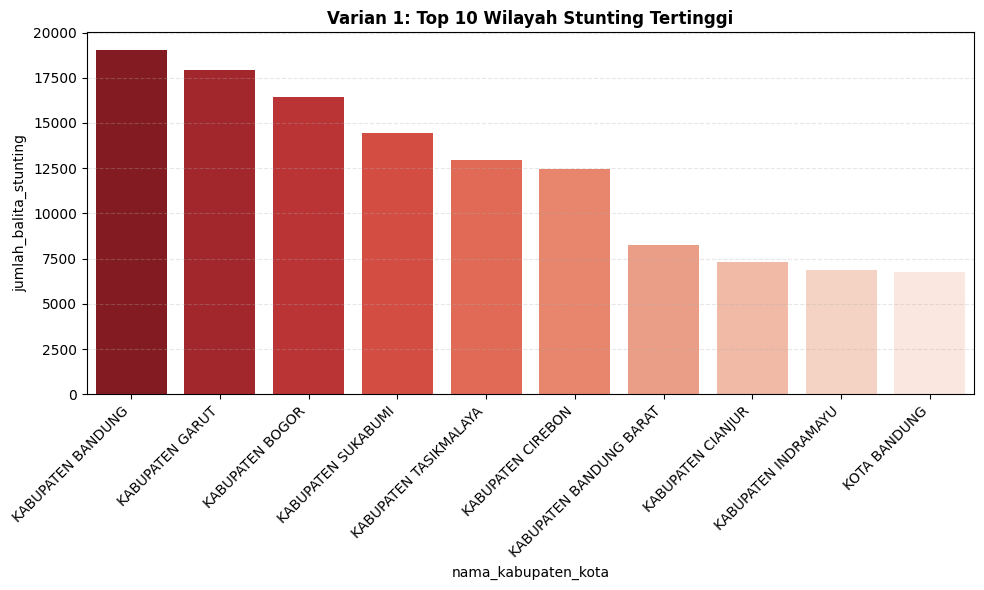

In [211]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot.head(10), x='nama_kabupaten_kota', y='jumlah_balita_stunting', palette='Reds_r')
plt.title('Varian 1: Top 10 Wilayah Stunting Tertinggi', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\saban\AppData\Local\Temp\ipykernel_13668\2370997324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, y='nama_kabupaten_kota', x='jumlah_balita_stunting', palette='viridis')


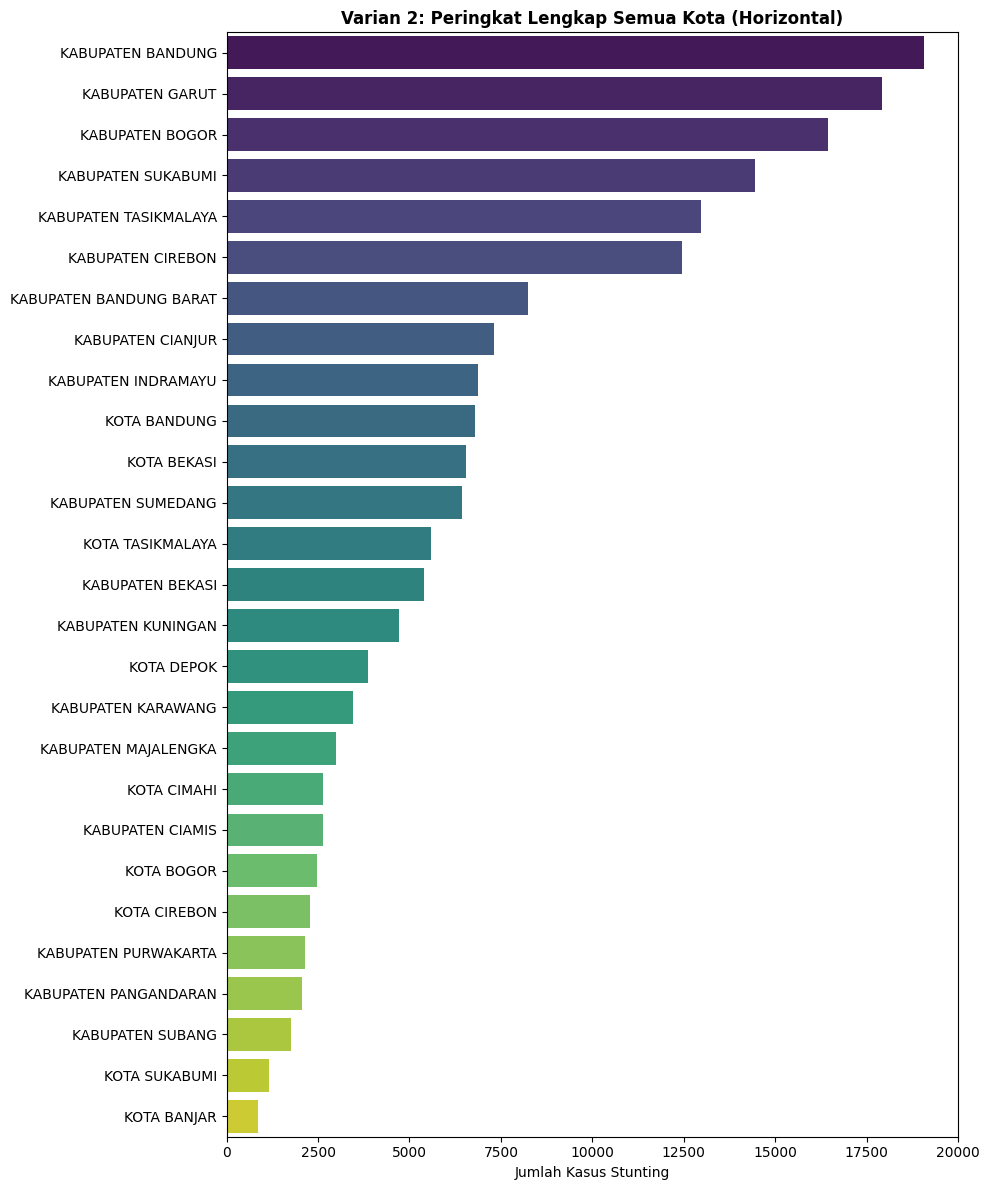

In [ ]:
plt.figure(figsize=(10, 12)) 
sns.barplot(data=df_plot, y='nama_kabupaten_kota', x='jumlah_balita_stunting', palette='viridis')
plt.title('Varian 2: Peringkat Lengkap Semua Kota (Horizontal)', fontweight='bold')
plt.xlabel('Jumlah Kasus Stunting')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\saban\AppData\Local\Temp\ipykernel_13668\3917241007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='nama_kabupaten_kota', y='jumlah_balita_stunting', palette=colors)


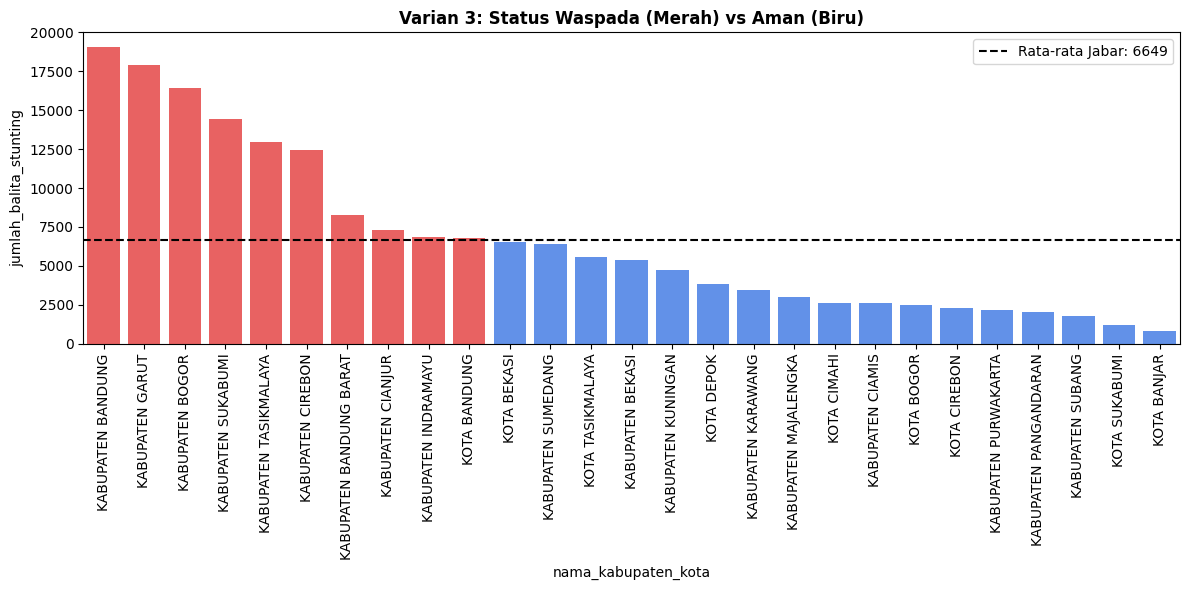

In [213]:
avg = df_plot['jumlah_balita_stunting'].mean()
colors = ['#ff4b4b' if x > avg else '#4b8Bff' for x in df_plot['jumlah_balita_stunting']]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='nama_kabupaten_kota', y='jumlah_balita_stunting', palette=colors)
plt.axhline(avg, color='black', linestyle='--', label=f'Rata-rata Jabar: {int(avg)}')
plt.title('Varian 3: Status Waspada (Merah) vs Aman (Biru)', fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

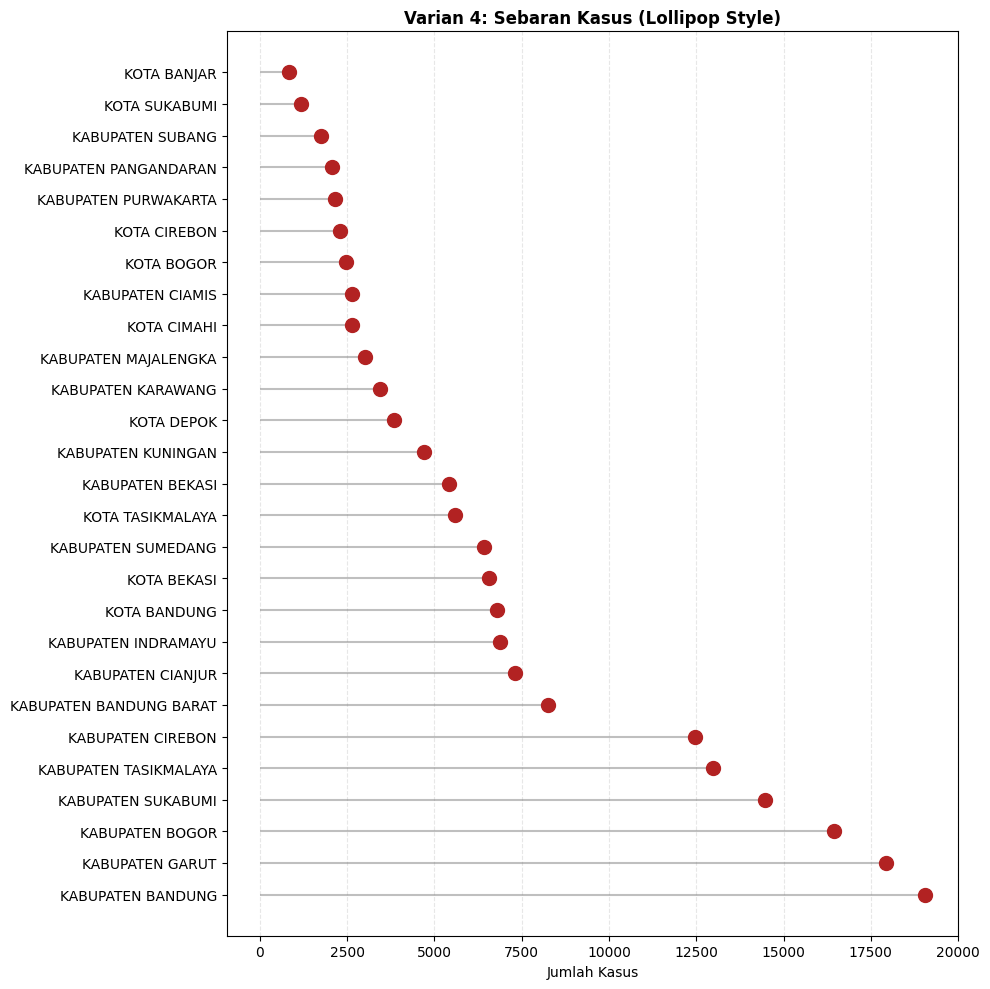

In [214]:
plt.figure(figsize=(10, 10))
plt.hlines(y=df_plot['nama_kabupaten_kota'], xmin=0, xmax=df_plot['jumlah_balita_stunting'], color='grey', alpha=0.5)
plt.plot(df_plot['jumlah_balita_stunting'], df_plot['nama_kabupaten_kota'], "o", markersize=10, color='firebrick')
plt.title('Varian 4: Sebaran Kasus (Lollipop Style)', fontweight='bold')
plt.xlabel('Jumlah Kasus')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Data Preparation

## Dataset Information

In [215]:
# berikan informasi dataset seperti jumlah kolom, jumlah baris, tipe data, dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nama_kabupaten_kota     135 non-null    object
 1   jumlah_imunisasi        135 non-null    int64 
 2   jumlah_bblr             135 non-null    int64 
 3   jumlah_balita_stunting  135 non-null    int64 
 4   jumlah_sanitasi         135 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.4+ KB


## Dataset Transformation

In [216]:
# jelaskan bagaimana dataset ditransformasikan sebelum diolah menggunakan model ML

In [217]:
# bisa menggunakan auto encoder atau manual menggunakan bins

## Determine Variabels

In [218]:
# tentukan variabel apa saja yang digunakan sebagai fitur/label
x = df[['jumlah_imunisasi','jumlah_bblr','jumlah_sanitasi']]
y = df['jumlah_balita_stunting']

In [219]:
x_test, x_train, y_test, y_train = train_test_split(x,y,random_state=3, test_size=0.2)

# Modeling

## Modeling classification / clustering

In [220]:
model = GradientBoostingRegressor(
    n_estimators=200,     # 200 Tahap perbaikan
    learning_rate=0.05,   # Belajar pelan-pelan (0.05) biar detail
    max_depth=3,          # Pohonnya gak usah dalam-dalam
    random_state=42
)
model.fit(x,y)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [221]:
newData = np.array([[50000,500,800000]])

In [222]:
predic = model.predict(newData)
predic

c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([5597.97238878])

In [223]:
y_pred = model.predict(x_test)

# Evaluation

## Model evaluation classification / clustering

In [224]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [225]:
print(f"mean squared error : {mse}")
print(f"R2 Score : {r2}")

mean squared error : 1384425.238039581
R2 Score : 0.9630245424573266


# Deployment

## Model Simulation

In [226]:
dataBaru = np.array([[200,3000,4000]])
prediksi = model.predict(dataBaru)

print("Hasil prediksi:", prediksi)

Hasil prediksi: [5328.03842086]


c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Save Model

In [227]:
# simpan model sebelum dilanjutka n ke aplikasi streamlit
import pickle
filename = 'model_stunting.pkl'
pickle.dump(model,open(filename, 'wb'))